## Singular value decomposition (SVD)

This section focuses on using using the SVD to find a linear subspace of lower dimension in which to project the data. The objective is to show that dimensionality reduction works well in linear subspaces when the underlying structure is linear but quickly shows limitation for non-linear structures.

### Application to affine function

The first application is an affine functions in R2

#### Function definition and SVD computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

n_sample = 100                                                                              # Choose number of samples
x = np.linspace(0,10,n_sample)                                                              # create vector x

# Affine parameters
a = 1.5                                                                                     # Slope
b=0                                                                                         # y-axis origin

# Affine function
y = a*x+b                                                                                   # Affine function
X = np.stack((x,y))                                                                         # Create numpy array

# Noise
n_coef = 1                                                                                  # Noise magnitude
X += + n_coef*np.random.rand(*X.shape)                                                      # Noisy data

# SVD
U,S,V = np.linalg.svd(X)                                                                   # SV Decomposition


#### Plots

Plot the principal directions from onto the data set

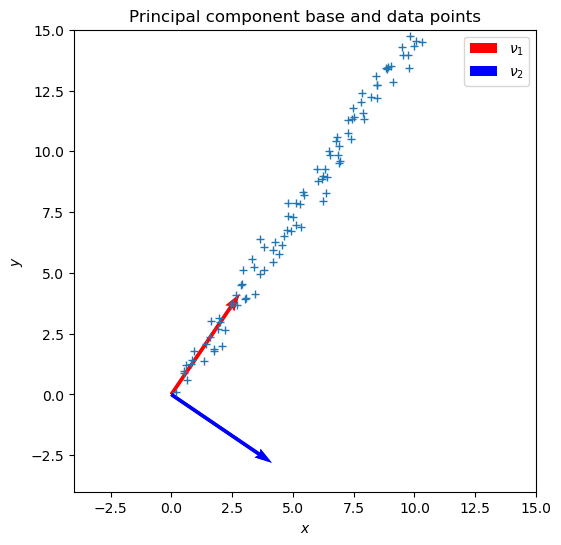

In [3]:

# plots
# Origin point
origin = np.array([[0, 0], [0, 0]]) 
U_scaled = -5*U
plt.figure(figsize=(6, 6))
# plt.quiver(*origin, U_scaled[:, 0], U_scaled[:, 1], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])
plt.quiver(*origin, U_scaled[0, 0], U_scaled[0, 1], angles='xy', scale_units='xy', scale=1, color=['r'], label=r'$\nu_1$')
plt.quiver(*origin, U_scaled[1, 0], U_scaled[1, 1], angles='xy', scale_units='xy', scale=1, color=['b'], label=r'$\nu_2$')
plt.legend()
plt.gca().set_aspect('equal')
plt.ylim(-4, 15)
plt.xlim(-4, 15)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.plot(X[0,:],X[1,:],'+')
plt.title("Principal component base and data points")
plt.show()
plt.close()



And in the latent space

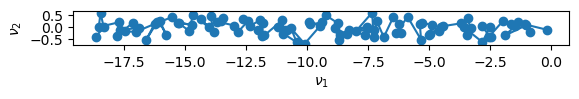

In [4]:

# in the latent space

X_tilde = np.transpose(U)@X
plt.plot(X_tilde[0,:],X_tilde[1,:],"-o")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r"$\nu_1$")
plt.ylabel(r"$\nu_2$")
plt.show()
plt.close()

We can see that the initial 2D data lie in a 1D space and that the first principal direction $\nu_1$ is sufficient to describe the data set.

### Application to non-linear function

To show the limitation of the SVD to find non-linear manifold, a sin function is now studied in a similar manner.

#### Function definition and SVD computation

In [5]:
# In 1D for an sin function


n_sample = 100                                                                              # Choose number of samples
# x = np.linspace(0,np.pi/4,n_sample)
x = np.linspace(0,6,n_sample)                                                               # create vector x

# Affine parameters
a = 1.5                                                                                     # Slope
b=0                                                                                         # y-axis origin

# Affine function
y = np.sin(x)                                                                               # Sin function
X = np.stack((x,y))                                                                         # Create numpy array

# Noise
n_coef = 0.1                                                                                  # Noise magnitude
X += + n_coef*np.random.rand(*X.shape)                                                      # Noisy data

# SVD
U,S,V = np.linalg.svd(X)                                                                   # SV Decomposition




#### Plots

Plot the principal directions from onto the data set

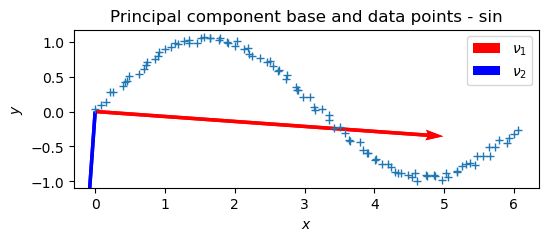

In [6]:

# plots


# Origin point
origin = np.array([[0, 0], [0, 0]]) 
U_scaled = -5*U
plt.figure(figsize=(6, 6))
# plt.quiver(*origin, U_scaled[:, 0], U_scaled[:, 1], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])
plt.quiver(*origin, U_scaled[0, 0], U_scaled[0, 1], angles='xy', scale_units='xy', scale=1, color=['r'], label=r'$\nu_1$')
plt.quiver(*origin, U_scaled[1, 0], U_scaled[1, 1], angles='xy', scale_units='xy', scale=1, color=['b'], label=r'$\nu_2$')
plt.legend()
plt.gca().set_aspect('equal')
# plt.ylim(-4, 15)
# plt.xlim(-4, 15)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.plot(X[0,:],X[1,:],'+')

plt.title("Principal component base and data points - sin")
plt.show()
plt.close()


And in the latent space

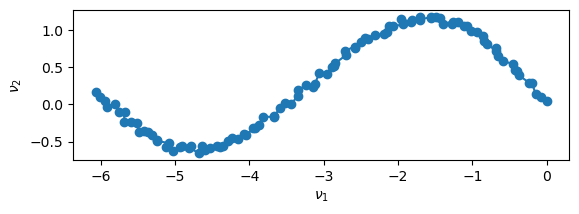

In [7]:
# in the latent space

X_tilde = np.transpose(U)@X
plt.plot(X_tilde[0,:],X_tilde[1,:],"-o")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r"$\nu_1$")
plt.ylabel(r"$\nu_2$")
plt.show()
plt.close()

The SVD does not exhibit a lower dimension space in which the data can be represented. Both principal directions are required to represent the non-linear data set.

## kernel Principal Component Analysis (kPCA)

This section focuses on using using the kPCA to find a non-linear manifold of lower dimension in which to project the data. The objective is to show that dimensionality reduction works well in non-linear cases where the SVD failed.

### Application to sin function

The first application is an sin functions in R3

#### Function definition and kPCA computation

In [8]:
x = np.linspace(0,4*np.pi,1500)
y = np.sin(x)                                                                   # Sin function
n_coef = 0                                                                      # Noise level
z = np.random.randn(*x.shape)        
X = np.stack((x,y,z))                                                           # Create 3D dataset
X += + n_coef*np.random.rand(*X.shape)                                          # Add noise

PCA conventions are transposed compared to SVD

In [9]:
Y = np.transpose(X)


##### kPCA parameters

In [10]:
n_components = 2                                                                 # Number of component of the kpca
sigma =100                                                                       # sigma for Gaussian kernel

##### Compute the (Gaussian) kernel

In [11]:
d_2 = np.sum(Y**2, axis=1).reshape(-1, 1) + np.sum(Y**2, axis=1) - 2 * np.dot(Y, Y.T)
K = np.exp(-d_2 / (2 * sigma**2))

##### Center the kernel matrix

In [12]:
n = K.shape[0]
one_n = np.ones((n, n)) / n
K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

SVD of the centered kernel

In [13]:
U, S, V = np.linalg.svd(K_centered)


Truncation and projection

In [14]:
U_k = U[:, :n_components]  # first eigenvectors
S_k = np.diag(S[:n_components])  # first singular values
# Project the centered kernel matrix onto the first eigenvectors
Y_kpca = U_k @ S_k  

### Plots

In the physical space

In [24]:


colors = plt.cm.viridis(np.linspace(0, 1, len(X[0,:])))                                        # Generate a color gradient

import plotly.graph_objects as go


# colors_plotly = colors[:, :3]
colors_plotly = np.linspace(0, 1, X.shape[1])

x_points = X[0, :]
y_points = X[1, :]
z_points = X[2, :]

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_points,
    y=y_points,
    z=z_points,
    mode='markers',
    marker=dict(
        size=5,                                                                         # Size of the markers
        color=colors_plotly,                                                            # Color of the markers
        colorscale='viridis',                                                           # Color scale
        showscale=True,                                                                 # Show color scale
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z',
    ),
    title='Physical Space'
)
fig.show()


In the latent space

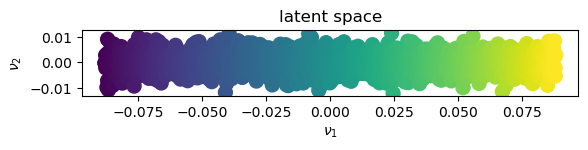

In [16]:
plt.scatter(Y_kpca[:,0], Y_kpca[:,1], color=colors, s=100)                                     # s=100 for larger points
plt.xlabel(r"$\nu_1$")
plt.ylabel(r"$\nu_2$")
plt.title('latent space')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()